# 凛冬将至，载入数据……

《权力的游戏》是一部热门美剧，HBO根据乔治·R·R·马丁的《冰与火之歌》改编而成。 
我们将分析小说《冰与火之歌》中人物的共现网络（co-occurrence network），即书中人物关系的可视化。 
在书中15个单词的附近（vicinity），若两个角色的姓名出现，那么，他们被认为是「共现」的。

该数据集构成了一个网络，以文本形式描述了角色之间的边（edges），每个边（edge）包含一些属性。
我们先载入第一本《权力的游戏》数据，检查它。

<p><img src="https://assets.datacamp.com/production/project_76/img/got_network.jpeg" style="width: 550px"></p>

In [0]:
import pandas as pd

book1 = pd.read_csv('datasets/book1.csv')

print(book1.head())

                            Source              Target        Type  weight  \
0                   Addam-Marbrand     Jaime-Lannister  Undirected       3   
1                   Addam-Marbrand     Tywin-Lannister  Undirected       6   
2                Aegon-I-Targaryen  Daenerys-Targaryen  Undirected       5   
3                Aegon-I-Targaryen        Eddard-Stark  Undirected       4   
4  Aemon-Targaryen-(Maester-Aemon)      Alliser-Thorne  Undirected       4   

   book  
0     1  
1     1  
2     1  
3     1  
4     1  


In [0]:
print(book1.tail())

               Source           Target        Type  weight  book
679  Tyrion-Lannister      Willis-Wode  Undirected       4     1
680  Tyrion-Lannister            Yoren  Undirected      10     1
681   Tywin-Lannister            Varys  Undirected       4     1
682   Tywin-Lannister      Walder-Frey  Undirected       8     1
683      Waymar-Royce  Will-(prologue)  Undirected      18     1


Source是来源，Target是目标，它们是以边（edge）来连接，一个网络图有向/无向的边，这个网络图之中的边都是无向的。

每个边的权重属性告诉我们人物在书中的「共现」次数，而「book」栏则告诉我们书的编号（《冰与火之歌》的第几卷）。

# 是时候了，来点权力的网络

使用 pandas 创建 DataFrame 之后，用网络分析包`networkx`，创建第一本书的图对象（Graph Object）。

In [0]:
import networkx as nx

# https://networkx.github.io/documentation/stable/tutorial.html

# 创建一个空的图对象

G_book1 = nx.Graph()

前面创建的图 G_book1 还是空的，用book1的边来填充它，再载入其他卷的书。

In [0]:
for _, edge in book1.iterrows():
    G_book1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

books = [G_book1]

book_fnames = ['datasets/book2.csv', 'datasets/book3.csv', 'datasets/book4.csv'
              , 'datasets/book5.csv']

for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    books.append(G_book)

# 谁是权力的游戏中，在人物网络图之中，最关键的节点人物？


是琼恩 · 雪诺，提利昂，丹妮莉丝，还是别人？ 让我们看看。

网络科学为我们提供了许多不同的度量标准来衡量网络中一个节点的重要性。 没有「绝对正确」的方法来计算网络中最重要的节点，每个度量都有不同的含义。

超链接的网络，是典型的有向网络（directed graph/network），比如说，我的主页链接了某些网站，但它们并没有我的博客网址。
人际社交网络是典型的无向网络（undirected graph/network），A关联B,B自然也关联A。

让我们通过查看网络中一个节点的邻居数量来衡量它的重要性，即它所连接的节点数量。 


简单理解，一个人的微信好友300，相比微信好友100的「度中心性」（Degree Centraility）就更高，
就是社交圈子大，私域流量的潜力更大。

使用这种方法，让我们从第一本书和第五本书中，提取十个最重要的人物。

In [0]:
deg_cen_book1 = nx.degree_centrality(books[0])

deg_cen_book5 = nx.degree_centrality(books[4])

sorted_deg_cen_book1 = sorted(deg_cen_book1.items(), key=lambda x: x[1], reverse=True)[0:10]

sorted_deg_cen_book5 = sorted(deg_cen_book5.items(), key=lambda x: x[1], reverse=True)[0:10]

print("Book 1")
print("--------"*11)
print(sorted_deg_cen_book1)
print("Book 5")
print("--------"*11)
print(sorted_deg_cen_book5)

Book 1
----------------------------------------------------------------------------------------
[('Eddard-Stark', 0.3548387096774194), ('Robert-Baratheon', 0.2688172043010753), ('Tyrion-Lannister', 0.24731182795698928), ('Catelyn-Stark', 0.23118279569892475), ('Jon-Snow', 0.19892473118279572), ('Sansa-Stark', 0.18817204301075272), ('Robb-Stark', 0.18817204301075272), ('Bran-Stark', 0.17204301075268819), ('Joffrey-Baratheon', 0.16129032258064518), ('Cersei-Lannister', 0.16129032258064518)]
Book 5
----------------------------------------------------------------------------------------
[('Jon-Snow', 0.1962025316455696), ('Daenerys-Targaryen', 0.18354430379746836), ('Stannis-Baratheon', 0.14873417721518986), ('Theon-Greyjoy', 0.10443037974683544), ('Tyrion-Lannister', 0.10443037974683544), ('Cersei-Lannister', 0.08860759493670886), ('Barristan-Selmy', 0.07911392405063292), ('Hizdahr-zo-Loraq', 0.06962025316455696), ('Asha-Greyjoy', 0.056962025316455694), ('Melisandre', 0.05379746835443038)

第五卷，似乎是琼恩 · 雪诺和丹妮莉丝·坦格利安为主，席恩·葛雷乔伊戏份也不少。

根据「度中心性」（Degree Centraility）第一本书权重最大的人物，是艾德· 斯塔克（Eddard Stark）。他后来就死亡了。
但他在第五本书，都不是权重最高的前十的人物。人物的重要程度，随着五本书的剧情进程而变化，故事在进展。
下面，查看第一本书的权重最高的十个人物，在后续的图书之中，它们的「度中心性」的变化。
他们的姓名是：艾德 · 史塔克、琼恩 · 雪诺和提利昂。

In [0]:
evol = [nx.degree_centrality(book) for book in books]

In [0]:
len(evol)

5

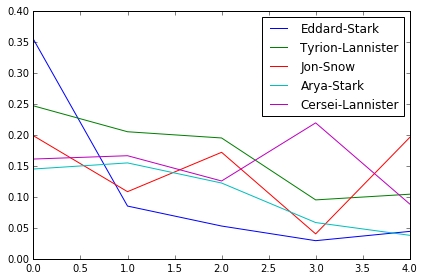

In [0]:
%matplotlib inline

evol = [nx.degree_centrality(book) for book in books]
 
degree_evol_df = pd.DataFrame.from_records(evol)

degree_evol_df[['Eddard-Stark', 'Tyrion-Lannister','Jon-Snow','Arya-Stark',
                'Cersei-Lannister']].plot()

第一本书的人物里，在第五本书，「琼恩 · 雪诺」的权重最高。
看起来，我喜欢的马脸「艾莉亚」，越往后「戏份」越少，第五本书里还没有她父亲「艾德-斯塔克」高。

下面，使用其他的测量术语「边中心性(Betweenness Centrality)」和「PageRank」，
来评估《权力的游戏》的「共同出现」网络里，不同角色权重的演变。

边中心性（betweenness centrality）从直觉角度理解，是将网络连接在一起的节点，必不可少的节点。如果移除这个节点，网络将被拆分。 
从数学的角度而言，它是指通过寻找所有节点对之间的最短路径，寻找大多数路径通过的节点，从而计算边中心性。

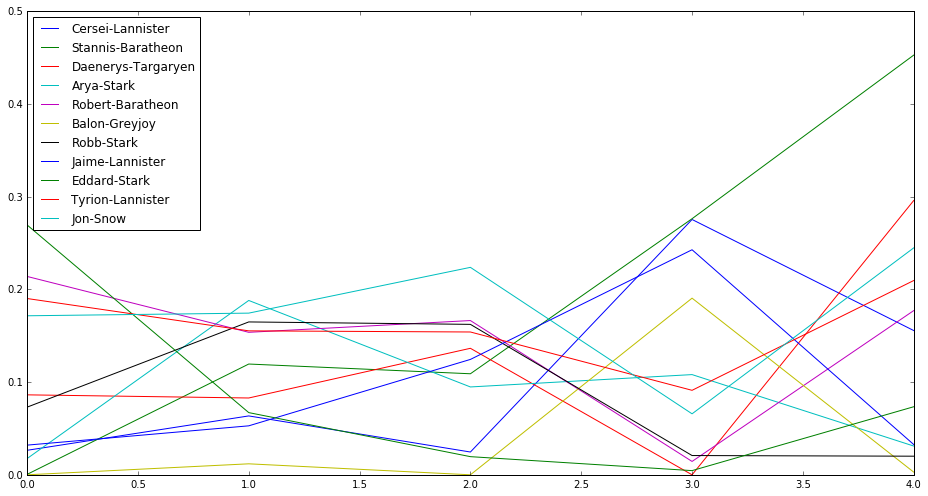

In [0]:
evol = [nx.betweenness_centrality(book) for book in books]

betweenness_evol_df = pd.DataFrame.from_records(evol).fillna(0)

set_of_char = set()
for i in range(5):
    set_of_char |= set(list(betweenness_evol_df.T[i].sort_values(ascending=False
                                                                 )[0:4].index))
list_of_char = list(set_of_char)

betweenness_evol_df[list_of_char].plot(figsize=(13, 7))

五本书之中，戏份最大的四个角色？



我们看到史坦尼斯 · 拜拉席恩的重要性比书本上升得特别快。 

在第五本书中，他显然比网络中的其他人物更重要，
尽管按照「度中心性（degree centrality）」来说，他是第三重要的人物。

PageRank是谷歌对网页排名的最初方式。 

它评估万维网中网页的内链和外链，万维网本质上是一个有向网络。 

让我们根据 PageRank 来看看《权力的游戏》网络中人物的重要性。

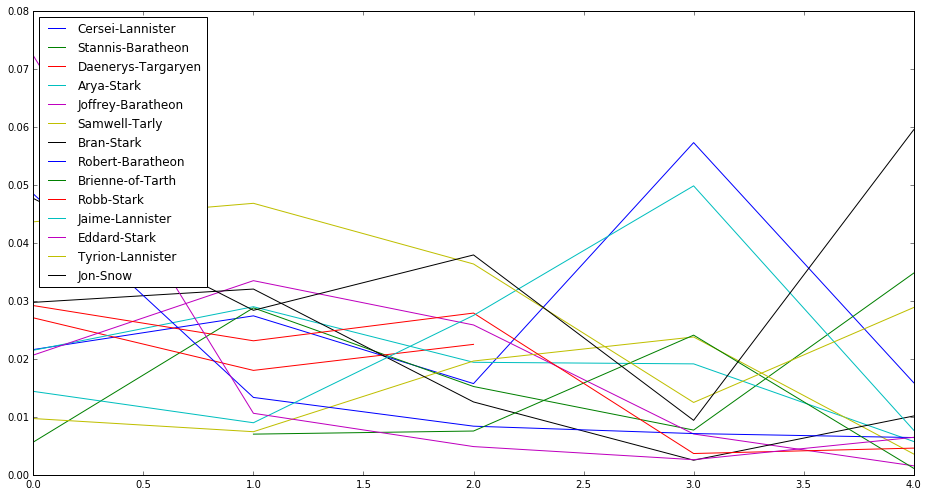

In [0]:
# Creating a list of pagerank of all the characters in all the books
evol = [nx.pagerank(book) for book in books]

# Making a DataFrame from the list
pagerank_evol_df = pd.DataFrame.from_records(evol)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(pagerank_evol_df.T[i].sort_values(ascending=False)
    [0:4].index))
list_of_char = list(set_of_char)

# Plotting the top characters
# ... YOUR CODE FOR TASK 7 ...

pagerank_evol_df[list_of_char].plot(figsize=(13, 7))

# 不同衡量指标之间的相关性

根据 PageRank，史坦尼斯、琼恩 · 雪诺和丹妮莉丝是第五本书中最重要的人物。 艾德 · 斯塔克遵循类似的曲线，但是在边中心性和度中心性方面: 他在第一本书中很重要，但是在系列书中被遗忘了。因为他死亡了。


我们已经看到了计算网络中一个节点重要性的三种不同方法，它们都告诉我们一些关于角色及其在共现网络中的重要性。 我们看到一些名字出现在三种衡量的排名之后，所以它们之间，可能有一个强的相关性？


让我们使用皮尔逊相关性，来看看第五本书的PageRank、边中心性和度中心性之间的相关性。

In [0]:
measures = [nx.pagerank(books[4]), 
            nx.betweenness_centrality(books[4], weight='weight'), 
            nx.degree_centrality(books[4])]

cor = pd.DataFrame.from_records(measures)

cor.T.corr()

,0,1,2
0,1.000000,0.793372,0.971493
1,0.793372,1.000000,0.833816
2,0.971493,0.833816,1.000000


我们看到，在我们的人物共现网络，这三种衡量指标之间的有着很高的相关性。

根据度中心性，艾德 · 史塔克是书中最重要的人物。 但是根据这三个标准，第五本书中最重要的人物是谁？

In [0]:
p_rank, b_cent, d_cent = cor.idxmax(axis=1)

print(p_rank, b_cent, d_cent)

Jon-Snow Stannis-Baratheon Jon-Snow


In [0]:
- 网页排名（PageRank）：琼恩 · 雪诺
- 边中心性（betweeness betweenness centrality）：史坦尼斯
- 度中心性（degree centrality）：琼恩 · 雪诺


到了马丁写完《冰与火之歌》结局，再来看看他们之间，会发生什么故事？